In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad
import torch
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
%load_ext autoreload
%autoreload 2

In [32]:
adata = sc.read_h5ad("data/Immune_ALL_human.h5ad")

In [45]:
adata

AnnData object with n_obs × n_vars = 33506 × 12303
    obs: 'batch', 'chemistry', 'data_type', 'dpt_pseudotime', 'final_annotation', 'mt_frac', 'n_counts', 'n_genes', 'sample_ID', 'size_factors', 'species', 'study', 'tissue', 'batch_chemistry', 'batch_batch'
    layers: 'counts'

In [34]:
sc.pp.normalize_total(adata, target_sum=1e4)

In [10]:
sc.tl.pca(adata, svd_solver='arpack')

In [11]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)

/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


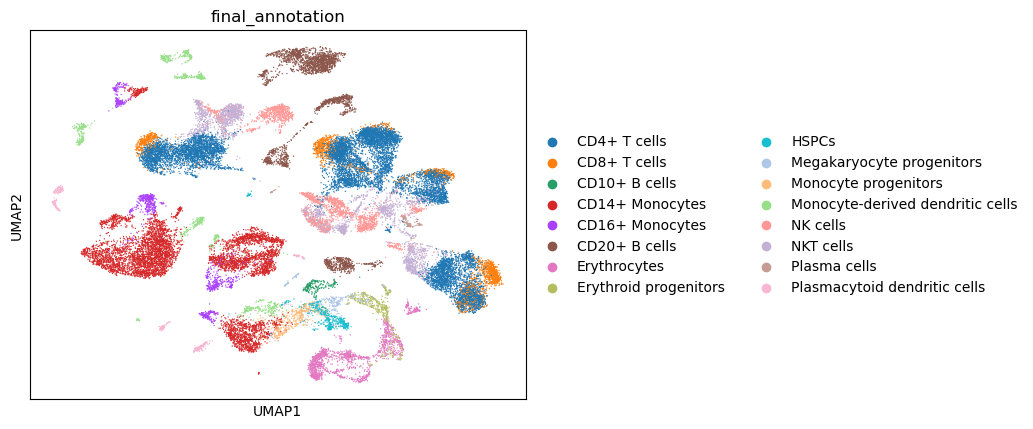

In [12]:
sc.pl.umap(adata, color='final_annotation', palette=sc.pl.palettes.vega_20_scanpy)

/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


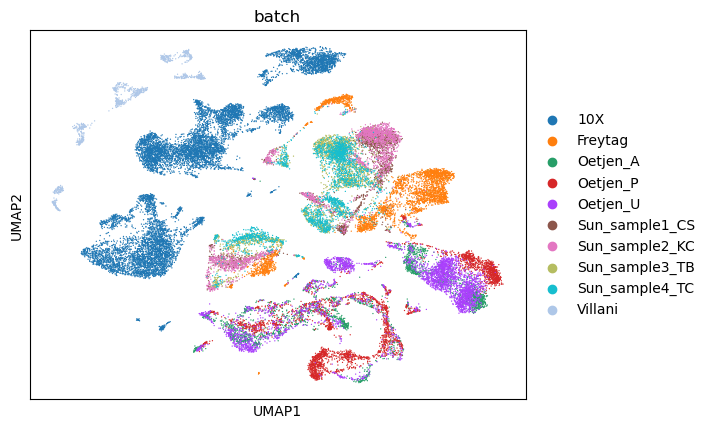

In [13]:
sc.pl.umap(adata, color='batch', palette=sc.pl.palettes.vega_20_scanpy)

/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


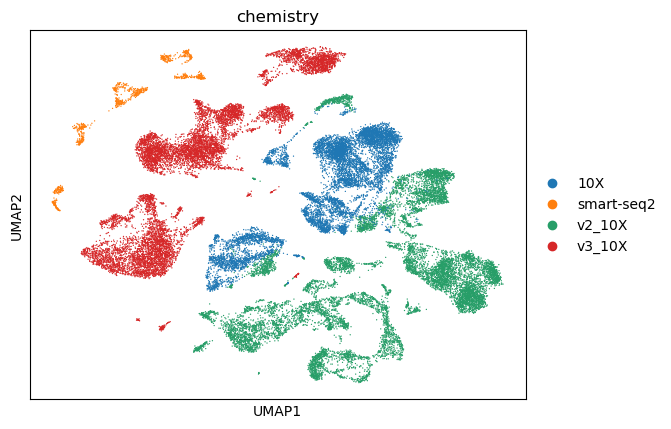

In [14]:
sc.pl.umap(adata, color='chemistry', palette=sc.pl.palettes.vega_20_scanpy)

/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


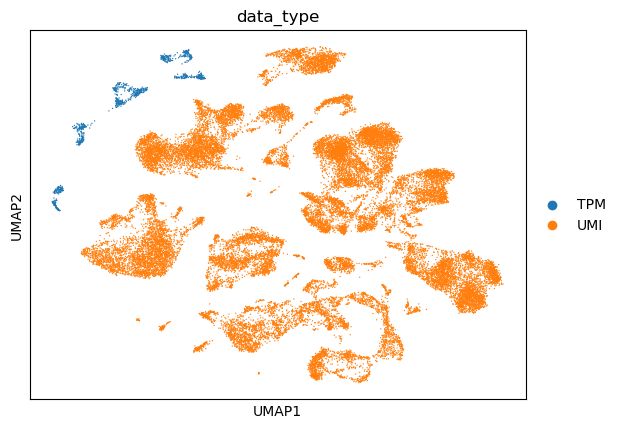

In [15]:
sc.pl.umap(adata, color='data_type', palette=sc.pl.palettes.vega_20_scanpy)

loss = MSE + 0.1 * sum(1/LISI)

In [35]:
from src.types import TrainParams

train_params = TrainParams(train_size=0.8, n_epochs=100, learning_rate=1e-4, batch_size=128, params_file="benchmark_human_immune")

In [36]:
from src.vae.model import VAE
from src.model import ModelParams

model_params = ModelParams(beta=0.01, n_layers=2, z_dim=100, n_hidden=300, use_cuda=True)
torch.set_num_threads(16)

model = VAE(adata, model_params)

In [19]:
from src.vae.train import train_vae
torch.autograd.set_detect_anomaly(False)

hist = train_vae(model, adata, batch_key="batch", params=train_params)

/media/gambino/students_workdir/anna/OtF-prostate/src/vae/dataloader.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[BATCH_KEY] = pd.Categorical(pd.factorize(adata.obs.loc[:, batch_key])[0])
/media/gambino/students_workdir/anna/OtF-prostate/src/vae/dataloader.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[BATCH_KEY] = pd.Categorical(pd.factorize(adata.obs.loc[:, batch_key])[0])
  4%|█▎                             | 9/210 [00:11<04:06,  1.22s/it]


AssertionError: NaN in parameters

100%|█████████████████████████████| 262/262 [00:17<00:00, 15.10it/s]
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = 

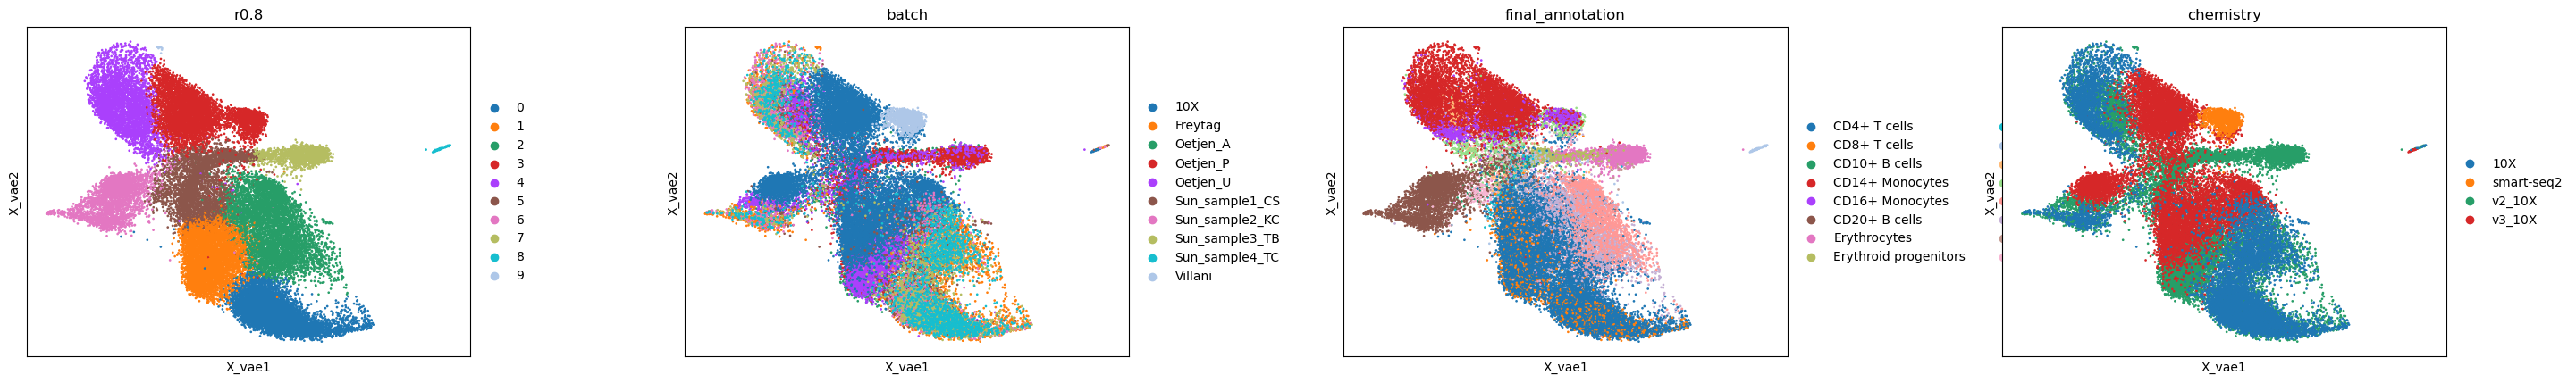

In [68]:
from src.vae.diagnostics import plot_embedding

model_dict = torch.load('mvae_params/benchmark_human_immune_0.1_20230403-233946.pt', map_location='cuda')
model.load_state_dict(model_dict)

plot_embedding(model, adata, keys=["batch", "final_annotation", "chemistry"], batch_key="batch", train_params=train_params)

/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


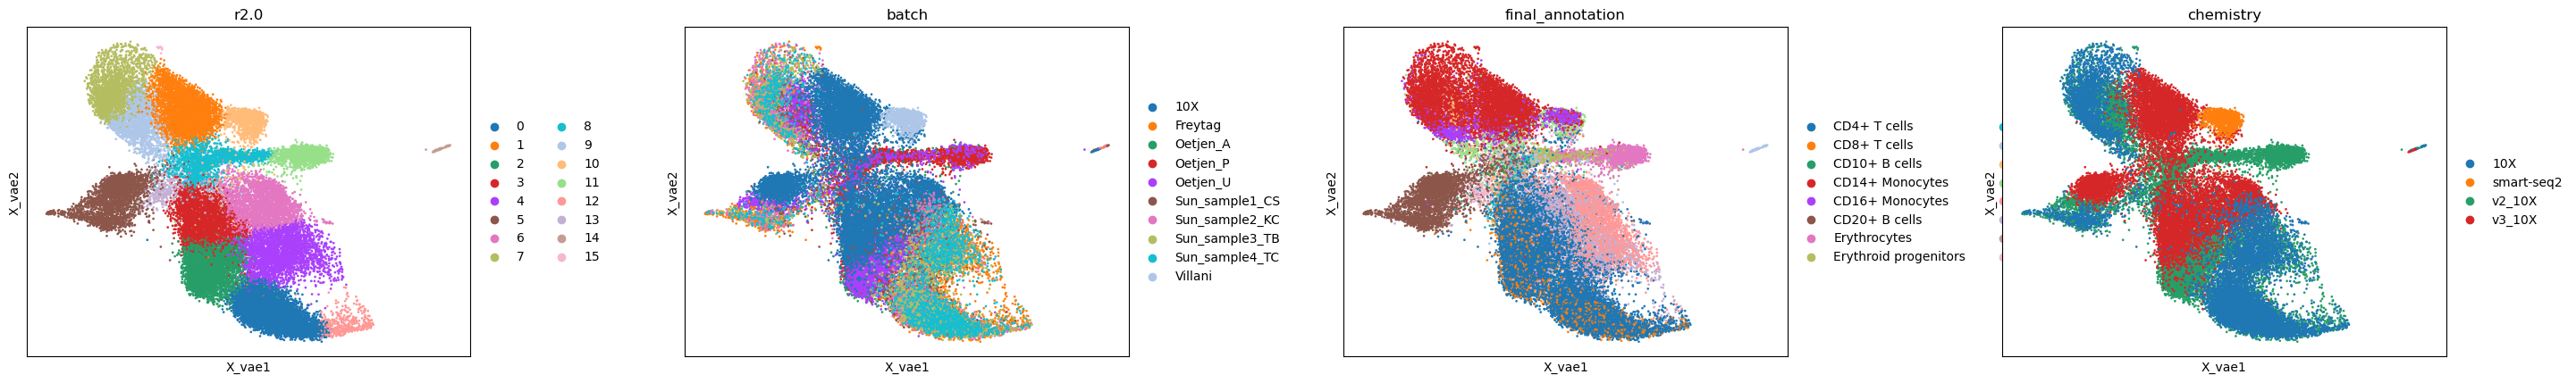

In [70]:
sc.tl.leiden(adata, resolution=2.0, key_added=f"r2.0")

sc.pl.embedding(
    adata,
    "X_vae",
    color=[f"r2.0", "batch", "final_annotation", "chemistry"],
    size=15,
    wspace=0.35,
)

loss = MSE + 0.1 * sum(1/LISI(batch)) + 0.01 * sum(1/LISI(chemistry))

In [51]:
from src.types import TrainParams

train_params = TrainParams(train_size=0.8, n_epochs=100, learning_rate=1e-4, batch_size=128, params_file="benchmark_human_immune_0.1_batch_0.01_ann")

In [55]:
from src.vae.model import VAE
from src.model import ModelParams

model_params = ModelParams(beta=0.01, n_layers=2, z_dim=100, n_hidden=300, use_cuda=True)
torch.set_num_threads(16)

model = VAE(adata, model_params)

In [56]:
from src.vae.train import train_vae
torch.autograd.set_detect_anomaly(False)

hist = train_vae(model, adata, batch_keys=["final_annotation", "batch"], params=train_params)

100%|█████████████████████████████| 210/210 [03:11<00:00,  1.09it/s]

EarlyStopping (epoch: 1): train loss improved to 0.27587434388402504



100%|███████████████████████████████| 53/53 [00:41<00:00,  1.29it/s]

EarlyStopping (epoch: 1): valid loss improved to 33.18507388852677



100%|█████████████████████████████| 210/210 [03:14<00:00,  1.08it/s]

EarlyStopping (epoch: 2): train loss improved to 0.20003853298233368



100%|███████████████████████████████| 53/53 [00:41<00:00,  1.28it/s]

EarlyStopping (epoch: 2): valid loss improved to 23.203521548577076



100%|█████████████████████████████| 210/210 [03:14<00:00,  1.08it/s]

EarlyStopping (epoch: 3): train loss improved to 0.15675578069694004



100%|███████████████████████████████| 53/53 [00:40<00:00,  1.30it/s]

EarlyStopping (epoch: 3): valid loss improved to 16.929051453212523



100%|█████████████████████████████| 210/210 [03:14<00:00,  1.08it/s]

EarlyStopping (epoch: 4): train loss improved to 0.12633379287389548



100%|███████████████████████████████| 53/53 [00:40<00:00,  1.31it/s]

EarlyStopping (epoch: 4): valid loss improved to 13.807156922682276



100%|█████████████████████████████| 210/210 [03:12<00:00,  1.09it/s]

EarlyStopping (epoch: 5): train loss improved to 0.10605743461145499



100%|███████████████████████████████| 53/53 [00:40<00:00,  1.31it/s]

EarlyStopping (epoch: 5): valid loss improved to 12.039383024539587



100%|█████████████████████████████| 210/210 [03:12<00:00,  1.09it/s]

EarlyStopping (epoch: 6): train loss improved to 0.0941731809875962



100%|███████████████████████████████| 53/53 [00:40<00:00,  1.31it/s]

EarlyStopping (epoch: 6): valid loss improved to 11.128021384185216



100%|███████████████████████████████| 53/53 [00:40<00:00,  1.32it/s]

EarlyStopping (epoch: 7): valid loss improved to 10.458993587853774



100%|███████████████████████████████| 53/53 [00:40<00:00,  1.31it/s]

EarlyStopping (epoch: 8): valid loss improved to 10.224880560389105



100%|█████████████████████████████| 210/210 [03:10<00:00,  1.10it/s]

EarlyStopping (epoch: 9): train loss improved to 0.08216391558292072



100%|███████████████████████████████| 53/53 [00:40<00:00,  1.31it/s]

EarlyStopping (epoch: 9): valid loss improved to 10.020058523933843



100%|███████████████████████████████| 53/53 [00:40<00:00,  1.32it/s]

EarlyStopping (epoch: 10): valid loss improved to 9.884389850328553



100%|███████████████████████████████| 53/53 [00:40<00:00,  1.31it/s]

EarlyStopping (epoch: 11): valid loss improved to 9.83431407640565



100%|███████████████████████████████| 53/53 [00:40<00:00,  1.32it/s]

EarlyStopping (epoch: 13): valid loss improved to 9.666834489354548



100%|███████████████████████████████| 53/53 [00:39<00:00,  1.33it/s]

EarlyStopping (epoch: 14): valid loss improved to 9.633842738169545



100%|███████████████████████████████| 53/53 [00:39<00:00,  1.34it/s]

EarlyStopping (epoch: 15): valid loss improved to 9.60299546763582



100%|███████████████████████████████| 53/53 [00:40<00:00,  1.32it/s]

EarlyStopping (epoch: 16): valid loss improved to 9.543036865738204



100%|███████████████████████████████| 53/53 [00:40<00:00,  1.32it/s]

EarlyStopping (epoch: 18): valid loss improved to 9.404959786613032



100%|█████████████████████████████| 210/210 [03:08<00:00,  1.11it/s]

EarlyStopping (epoch: 19): train loss hasn't improved: 0.07599998111067344. Stopping.



100%|███████████████████████████████| 53/53 [00:39<00:00,  1.33it/s]

EarlyStopping (epoch: 19): valid loss improved to 9.377731683119288



100%|█████████████████████████████| 210/210 [03:08<00:00,  1.11it/s]

EarlyStopping (epoch: 20): train loss hasn't improved: 0.07551633555610542. Stopping.



100%|█████████████████████████████| 210/210 [03:08<00:00,  1.11it/s]

EarlyStopping (epoch: 21): train loss hasn't improved: 0.07546434610961995. Stopping.



100%|█████████████████████████████| 210/210 [03:08<00:00,  1.11it/s]

EarlyStopping (epoch: 22): train loss hasn't improved: 0.07519268007567348. Stopping.



100%|███████████████████████████████| 53/53 [00:40<00:00,  1.32it/s]

EarlyStopping (epoch: 22): valid loss improved to 9.358485059918097



100%|█████████████████████████████| 210/210 [03:08<00:00,  1.11it/s]

EarlyStopping (epoch: 23): train loss hasn't improved: 0.0749329041587899. Stopping.



100%|███████████████████████████████| 53/53 [00:39<00:00,  1.33it/s]

EarlyStopping (epoch: 23): valid loss improved to 9.317360967959997



100%|█████████████████████████████| 210/210 [03:08<00:00,  1.11it/s]

EarlyStopping (epoch: 24): train loss hasn't improved: 0.07468956713355525. Stopping.



100%|███████████████████████████████| 53/53 [00:39<00:00,  1.33it/s]

EarlyStopping (epoch: 24): valid loss improved to 9.270284166875875



100%|█████████████████████████████| 210/210 [03:09<00:00,  1.11it/s]

EarlyStopping (epoch: 25): train loss hasn't improved: 0.0747388537082009. Stopping.



100%|█████████████████████████████| 210/210 [03:07<00:00,  1.12it/s]

EarlyStopping (epoch: 26): train loss hasn't improved: 0.07457836566265262. Stopping.



100%|█████████████████████████████| 210/210 [03:07<00:00,  1.12it/s]

EarlyStopping (epoch: 27): train loss hasn't improved: 0.07437124269753316. Stopping.



100%|███████████████████████████████| 53/53 [00:39<00:00,  1.33it/s]

EarlyStopping (epoch: 27): valid loss improved to 9.22133384560639



100%|█████████████████████████████| 210/210 [03:07<00:00,  1.12it/s]

EarlyStopping (epoch: 28): train loss hasn't improved: 0.07427995775265758. Stopping.



100%|█████████████████████████████| 210/210 [03:08<00:00,  1.12it/s]

EarlyStopping (epoch: 29): train loss hasn't improved: 0.07429955973765366. Stopping.



100%|███████████████████████████████| 53/53 [00:39<00:00,  1.34it/s]

EarlyStopping (epoch: 29): valid loss improved to 9.162748642687527



100%|█████████████████████████████| 210/210 [03:07<00:00,  1.12it/s]

EarlyStopping (epoch: 30): train loss hasn't improved: 0.07393156807914703. Stopping.



100%|█████████████████████████████| 210/210 [03:07<00:00,  1.12it/s]

EarlyStopping (epoch: 32): train loss hasn't improved: 0.07397830228345854. Stopping.



100%|█████████████████████████████| 210/210 [03:08<00:00,  1.12it/s]

EarlyStopping (epoch: 33): train loss hasn't improved: 0.0737155360119536. Stopping.



100%|█████████████████████████████| 210/210 [03:07<00:00,  1.12it/s]

EarlyStopping (epoch: 34): train loss hasn't improved: 0.07378379278548741. Stopping.



100%|███████████████████████████████| 53/53 [00:40<00:00,  1.31it/s]

EarlyStopping (epoch: 34): valid loss improved to 9.14193032822519



100%|█████████████████████████████| 210/210 [03:06<00:00,  1.13it/s]

EarlyStopping (epoch: 35): train loss hasn't improved: 0.07349646886664173. Stopping.



100%|███████████████████████████████| 53/53 [00:40<00:00,  1.32it/s]

EarlyStopping (epoch: 35): valid loss improved to 9.121268146442917



100%|█████████████████████████████| 210/210 [03:07<00:00,  1.12it/s]

EarlyStopping (epoch: 36): train loss hasn't improved: 0.0734501824309943. Stopping.



100%|█████████████████████████████| 210/210 [03:06<00:00,  1.13it/s]

EarlyStopping (epoch: 37): train loss hasn't improved: 0.07345709726358951. Stopping.



100%|█████████████████████████████| 210/210 [03:07<00:00,  1.12it/s]

EarlyStopping (epoch: 38): train loss hasn't improved: 0.07335422252865091. Stopping.



100%|█████████████████████████████| 210/210 [03:08<00:00,  1.11it/s]

EarlyStopping (epoch: 39): train loss hasn't improved: 0.07336635995918095. Stopping.



 13%|████                          | 28/210 [00:27<02:59,  1.02it/s]


KeyboardInterrupt: 

100%|█████████████████████████████| 262/262 [00:27<00:00,  9.42it/s]
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = 

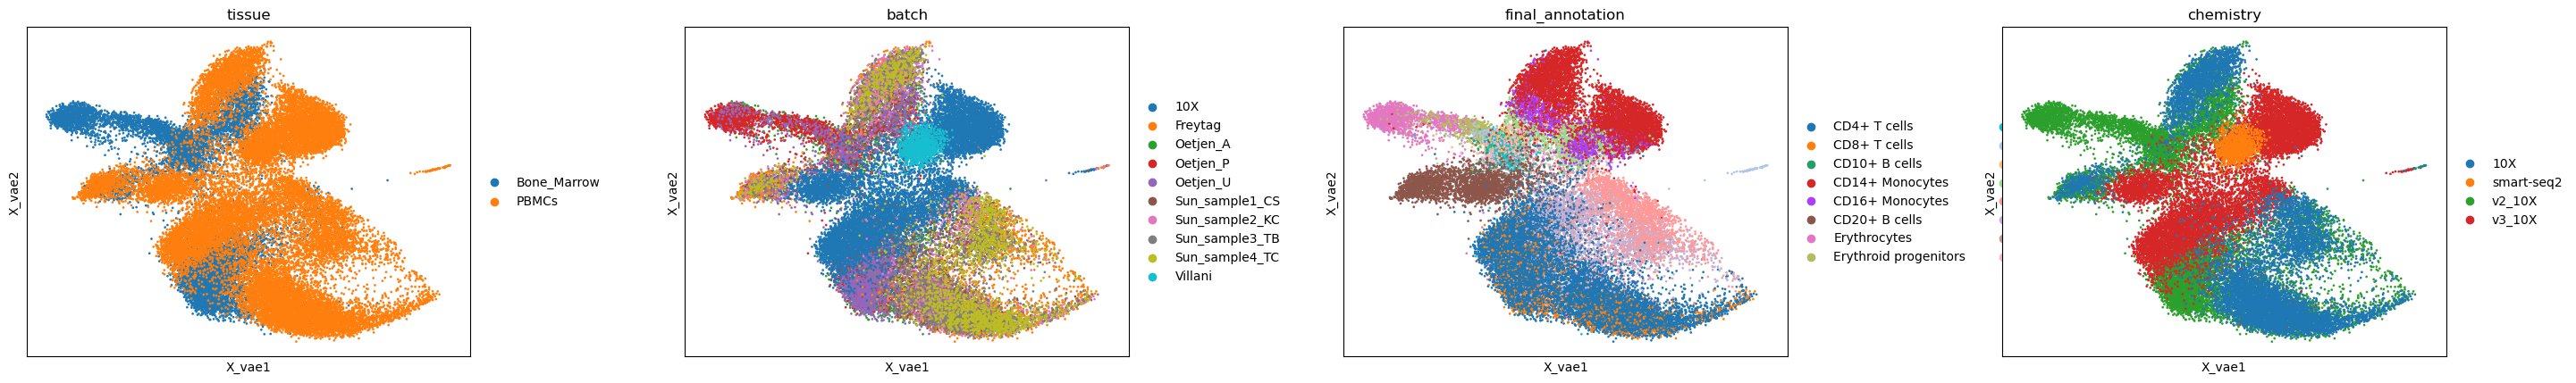

In [57]:
from src.vae.diagnostics import plot_embedding

plot_embedding(model, adata, keys=["tissue", "batch", "final_annotation", "chemistry"], batch_keys=["final_annotation", "batch"], train_params=train_params)

/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


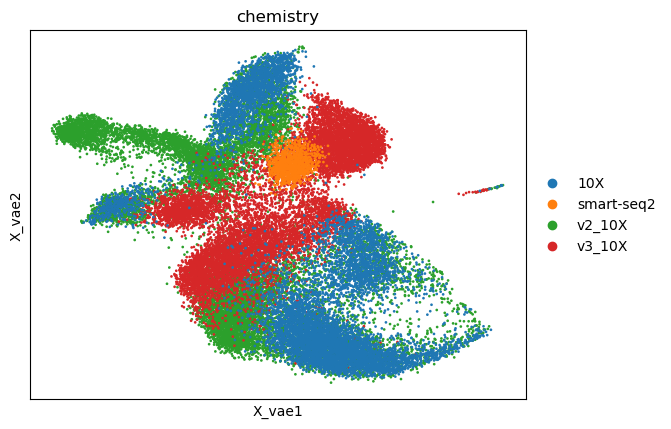

In [61]:
sc.pl.embedding(
    adata,
    "X_vae",
    color=["chemistry"],
    size=15,
    wspace=0.35,
)

In [14]:
adata.uns

OverloadedDict, wrapping:
	OrderedDict()
With overloaded keys:
	['neighbors'].